In [1]:
#!pip install tweepy

In [1]:
import tweepy

In [2]:
#keys taken from twitter developer account
consumer_key = 'STmfnnIiWOKB8S5SENEUAGZAZ'
consumer_secret  = 'uM6gVsNw7qTrpuicXVFx3Vgb8qyA6bdDNpfJhU01oll5bDUnmQ'
access_token = '1102777661523410944-mkT0HKSNzbspAxnfsAPiaM18g8gD9D'
access_secret = 'CiXpgkpHZ0PB6DdvzIAXadjWEPXQta8iCbVPjv5UPVHzv'

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api =tweepy.API(auth)  #tweepy.API(auth,waitonratelimit = True) -To extract more tweets

# Scraping modi tweets

In [6]:
modi_tweets = api.user_timeline('narendramodi',page=1,count=200)
len(modi_tweets)

200

In [8]:
modi_tweets[0]

Status(_api=<tweepy.api.API object at 0x00000234DBBBE3C8>, _json={'created_at': 'Mon Apr 01 03:28:25 +0000 2019', 'id': 1112557299456004097, 'id_str': '1112557299456004097', 'text': 'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/T6CNMHIDjx', 'expanded_url': 'https://twitter.com/i/web/status/1112557299456004097', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [115, 138]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Chowkidar Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'descriptio

In [9]:
modi_tweets[0].text

'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx'

In [11]:
modi_tweets[0].created_at

datetime.datetime(2019, 4, 1, 3, 28, 25)

In [12]:
modi_tweets[0]._json

{'created_at': 'Mon Apr 01 03:28:25 +0000 2019',
 'id': 1112557299456004097,
 'id_str': '1112557299456004097',
 'text': 'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/T6CNMHIDjx',
    'expanded_url': 'https://twitter.com/i/web/status/1112557299456004097',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [115, 138]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 18839785,
  'id_str': '18839785',
  'name': 'Chowkidar Narendra Modi',
  'screen_name': 'narendramodi',
  'location': 'India',
  'description': 'Prime Minister of In

In [13]:
modi_tweets[0].user.location

'India'

In [14]:
modi_tweets[0].user.description

'Prime Minister of India'

In [16]:
modi_tweets[0].favorite_count

5216

In [17]:
import pandas as pd

In [18]:
df_modi_tweets = pd.DataFrame()

for tweet in modi_tweets:
    curr_tweet = {
        'text' : tweet.text,
        'likes' : tweet.favorite_count,
        'retweets' : tweet.retweet_count,
        'created_at' : tweet.created_at,
        'source':tweet.source
    }
    df_modi_tweets = df_modi_tweets.append(curr_tweet,ignore_index=True)
df_modi_tweets.head()


,created_at,likes,retweets,source,text
0,2019-04-01 03:28:25,5216.0,1311.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...
1,2019-04-01 03:14:06,3425.0,906.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...
2,2019-04-01 03:11:17,2605.0,681.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...
3,2019-04-01 03:09:43,2997.0,758.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...
4,2019-04-01 03:07:57,8081.0,1540.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...


In [19]:
df_modi_tweets = pd.DataFrame()
for page in range(1,21):
    modi_tweets = api.user_timeline('narendramodi',page=page,count=200)
    
    for tweet in modi_tweets:
        curr_tweet = {
            'text' : tweet.text,
            'likes' : tweet.favorite_count,
            'retweets' : tweet.retweet_count,
            'created_at' : tweet.created_at,
            'source':tweet.source
        }
        df_modi_tweets = df_modi_tweets.append(curr_tweet,ignore_index=True)
df_modi_tweets.head()

,created_at,likes,retweets,source,text
0,2019-04-01 03:28:25,6221.0,1575.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...
1,2019-04-01 03:14:06,3880.0,1043.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...
2,2019-04-01 03:11:17,2993.0,765.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...
3,2019-04-01 03:09:43,3464.0,855.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...
4,2019-04-01 03:07:57,9735.0,1842.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...


In [21]:
len(df_modi_tweets)

3215

In [22]:
import os
os.chdir('D:\Manipal Pro learn\Term1\DataScrapping')

In [23]:
df_modi_tweets.to_csv('narendra_modi_tweets.csv')

# Twitter Analysis

In [24]:
df_modi_tweets['source'].value_counts()

Twitter Web Client      1633
Twitter Media Studio     741
Twitter for iPhone       535
Periscope                213
Twitter for Android       92
Twitter Ads Composer       1
Name: source, dtype: int64

In [26]:
df_modi_tweets.sort_values(by = 'likes',ascending=False).head()

,created_at,likes,retweets,source,text
357,2019-03-01 16:34:29,271910.0,66478.0,Twitter for iPhone,Welcome Home Wing Commander Abhinandan!\n\nThe...
170,2019-03-16 03:30:15,160811.0,56400.0,Twitter Ads Composer,Your Chowkidar is standing firm &amp; serving ...
486,2019-02-15 16:29:33,156913.0,37956.0,Twitter for iPhone,"We salute you, brave sons of Mother India. \n\..."
490,2019-02-14 13:16:57,130632.0,41242.0,Twitter for Android,Attack on CRPF personnel in Pulwama is despica...
81,2019-03-27 05:53:17,129102.0,33082.0,Twitter Web Client,"मेरे प्यारे देशवासियों, \n\nआज सवेरे लगभग 11.4..."


In [30]:
df_modi_tweets['date'] = pd.to_datetime(df_modi_tweets['created_at'])
df_modi_tweets.head()

,created_at,likes,retweets,source,text,date
0,2019-04-01 03:28:25,6221.0,1575.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...,2019-04-01 03:28:25
1,2019-04-01 03:14:06,3880.0,1043.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...,2019-04-01 03:14:06
2,2019-04-01 03:11:17,2993.0,765.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...,2019-04-01 03:11:17
3,2019-04-01 03:09:43,3464.0,855.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...,2019-04-01 03:09:43
4,2019-04-01 03:07:57,9735.0,1842.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...,2019-04-01 03:07:57


In [31]:
df_modi_tweets['date'].min()

Timestamp('2018-06-21 10:36:05')

In [32]:
df_modi_tweets['hour'] = df_modi_tweets['date'].dt.hour
df_modi_tweets.head()

,created_at,likes,retweets,source,text,date,hour
0,2019-04-01 03:28:25,6221.0,1575.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...,2019-04-01 03:28:25,3
1,2019-04-01 03:14:06,3880.0,1043.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...,2019-04-01 03:14:06,3
2,2019-04-01 03:11:17,2993.0,765.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...,2019-04-01 03:11:17,3
3,2019-04-01 03:09:43,3464.0,855.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...,2019-04-01 03:09:43,3
4,2019-04-01 03:07:57,9735.0,1842.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...,2019-04-01 03:07:57,3


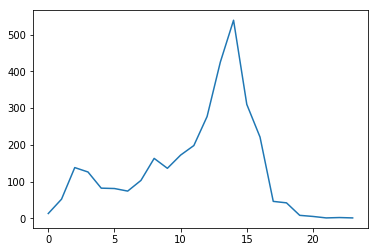

In [34]:
df_modi_tweets['hour'].value_counts().sort_index().plot.line()

In [36]:
#to convert from one timezone to another
from pytz import timezone

In [42]:
indiatzone = timezone('Asia/Kolkata')
indiatzone

<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>

In [45]:
df_modi_tweets['date'].apply(lambda x:indiatzone.normalize(x))

ValueError: Naive time - no tzinfo set

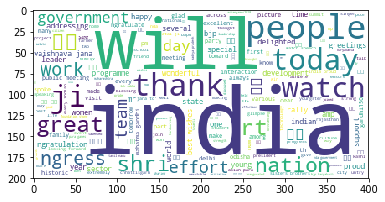

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
docs = df_modi_tweets['text'].str.lower()
docs = docs.str.replace('https','').str.replace('co','')
wc = WordCloud(background_color='white').generate(' '.join(docs))
plt.imshow(wc)

# Identify frequency of each hashtag used by modi

In [54]:
hashtags = []
hashtags = [word for text in df_modi_tweets['text'] for word in text.split() if word.startswith('#')]
hashtags[:5]

['#MainBhiChowkidar.',
 '#MainBhiChowkidar',
 '#MainBhiChowkidar',
 '#MainBhiChowkidar',
 '#ModiSpeaksToBharat']

In [56]:
len(set(hashtags))

145

In [59]:
pd.Series(hashtags).value_counts().nlargest(10)

#Gandhi150                   32
#MannKiBaat                  31
#ModiSpeaksToBharat          10
#MainBhiChowkidar             7
#MannKiBaat.                  7
#AsianGames2018               6
#WorldTourismDay              6
#InternationalYogaDay2018     5
#IndependenceDayIndia         4
#Yoga                         4
dtype: int64

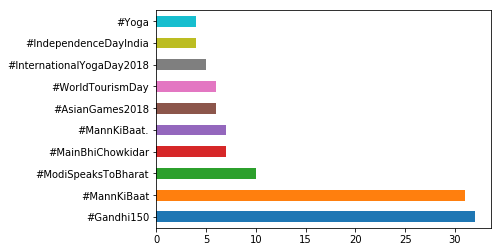

In [63]:
pd.Series(hashtags).value_counts().nlargest(10).plot.barh()

In [65]:
df_modi_tweets['month'] = df_modi_tweets['date'].dt.month
df_modi_tweets.head()

,created_at,likes,retweets,source,text,date,hour,month
0,2019-04-01 03:28:25,6221.0,1575.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...,2019-04-01 03:28:25,3,4
1,2019-04-01 03:14:06,3880.0,1043.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...,2019-04-01 03:14:06,3,4
2,2019-04-01 03:11:17,2993.0,765.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...,2019-04-01 03:11:17,3,4
3,2019-04-01 03:09:43,3464.0,855.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...,2019-04-01 03:09:43,3,4
4,2019-04-01 03:07:57,9735.0,1842.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...,2019-04-01 03:07:57,3,4


# Frequency of a hashtag across month

In [70]:
def hashtag(txt):
    if '#MannKiBaat' in txt:
        return 1
    else :
        return 0
                    
df_modi_tweets['MannKiBaat'] = df_modi_tweets['text'].apply(hashtag)  #lambda x: 1 if '#MannKiBaat' in x else 0
df_modi_tweets.head()

,created_at,likes,retweets,source,text,date,hour,month,MannKiBaat
0,2019-04-01 03:28:25,6221.0,1575.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...,2019-04-01 03:28:25,3,4,0
1,2019-04-01 03:14:06,3880.0,1043.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...,2019-04-01 03:14:06,3,4,0
2,2019-04-01 03:11:17,2993.0,765.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...,2019-04-01 03:11:17,3,4,0
3,2019-04-01 03:09:43,3464.0,855.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...,2019-04-01 03:09:43,3,4,0
4,2019-04-01 03:07:57,9735.0,1842.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...,2019-04-01 03:07:57,3,4,0


In [87]:
df_modi_tweets['month_year'] = df_modi_tweets['date'].dt.strftime('%y-%m')
df_modi_tweets.head()

,created_at,likes,retweets,source,text,date,hour,month,MannKiBaat,month_year
0,2019-04-01 03:28:25,6221.0,1575.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...,2019-04-01 03:28:25,3,4,0,19-04
1,2019-04-01 03:14:06,3880.0,1043.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...,2019-04-01 03:14:06,3,4,0,19-04
2,2019-04-01 03:11:17,2993.0,765.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...,2019-04-01 03:11:17,3,4,0,19-04
3,2019-04-01 03:09:43,3464.0,855.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...,2019-04-01 03:09:43,3,4,0,19-04
4,2019-04-01 03:07:57,9735.0,1842.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...,2019-04-01 03:07:57,3,4,0,19-04


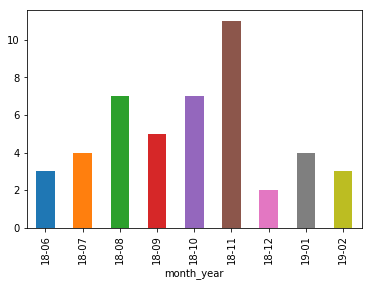

In [90]:
df_modi_tweets[df_modi_tweets['MannKiBaat'] == 1][['month_year','MannKiBaat']].groupby('month_year').size().plot.bar()

In [91]:
df_modi_tweets['day'] = df_modi_tweets['date'].dt.day
df_modi_tweets['weekday'] = df_modi_tweets['date'].dt.strftime('%A')
df_modi_tweets['hour'] = df_modi_tweets['date'].dt.hour
df_modi_tweets.head()

,created_at,likes,retweets,source,text,date,hour,month,MannKiBaat,month_year,day,weekday
0,2019-04-01 03:28:25,6221.0,1575.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...,2019-04-01 03:28:25,3,4,0,19-04,1,Monday
1,2019-04-01 03:14:06,3880.0,1043.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...,2019-04-01 03:14:06,3,4,0,19-04,1,Monday
2,2019-04-01 03:11:17,2993.0,765.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...,2019-04-01 03:11:17,3,4,0,19-04,1,Monday
3,2019-04-01 03:09:43,3464.0,855.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...,2019-04-01 03:09:43,3,4,0,19-04,1,Monday
4,2019-04-01 03:07:57,9735.0,1842.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...,2019-04-01 03:07:57,3,4,0,19-04,1,Monday


In [93]:
summary = df_modi_tweets.groupby(['month_year','day']).size().reset_index()
summary = summary.rename(columns={0:'count'})
summary.head()

,month_year,day,count
0,18-06,21,34
1,18-06,22,3
2,18-06,23,11
3,18-06,24,10
4,18-06,25,3


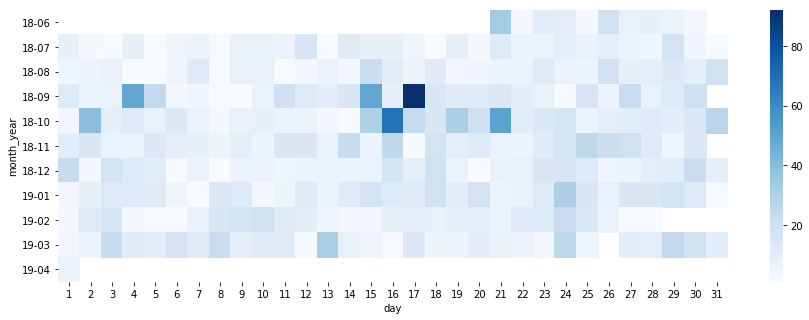

In [98]:
import seaborn as sns
sns.heatmap(summary.pivot('month_year','day','count'),cmap='Blues')

In [97]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]


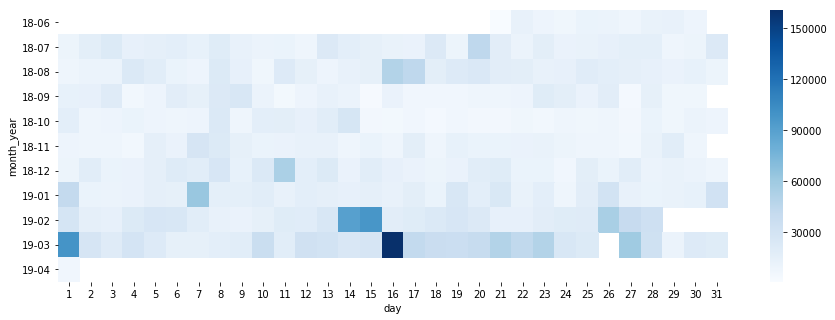

In [101]:
summary = df_modi_tweets.groupby(['month_year','day'])['likes'].mean().reset_index()
summary = summary.rename(columns={0:'count'})
sns.heatmap(summary.pivot('month_year','day','likes'),cmap='Blues')

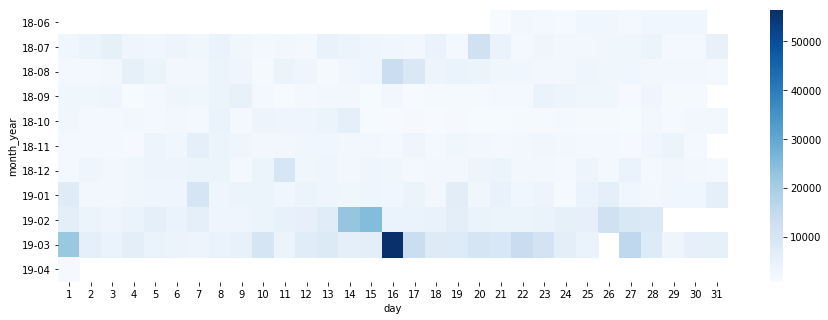

In [103]:
summary = df_modi_tweets.groupby(['month_year','day'])['retweets'].mean().reset_index()
summary = summary.rename(columns={0:'count'})
sns.heatmap(summary.pivot('month_year','day','retweets'),cmap='Blues')